In [188]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore

# Q1. Load the Credit dataset file into Python DataFrame. 


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. 

In [189]:
df = pd.read_csv("germanCreditDefault.csv")

In [190]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [191]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_balance,1000,4,unknown,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_loan_duration,1000,NaN,NaN,NaN,20.903,12.0588,4,12,18,24,72
credit_history,1000,5,good,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,6,furniture/appliances,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1000,NaN,NaN,NaN,3271.26,2822.74,250,1365.5,2319.5,3972.25,18424
savings_balance,1000,5,< 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,1000,5,1 - 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_of_income,1000,NaN,NaN,NaN,2.973,1.11871,1,2,3,4,4
years_at_residence,1000,NaN,NaN,NaN,2.845,1.10372,1,2,3,4,4
age,1000,NaN,NaN,NaN,35.546,11.3755,19,27,33,42,75


In [192]:
# Check if we have any null values in given dataframe
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

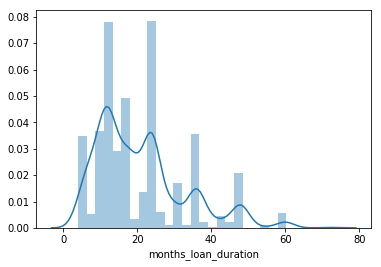

In [193]:
# Some univariate analysis
sns.distplot(df["months_loan_duration"])

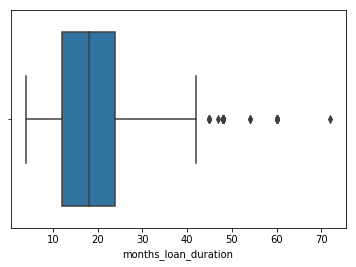

In [194]:
sns.boxplot(df["months_loan_duration"])
# There are a few (6) outliers. Are they really outliers? 

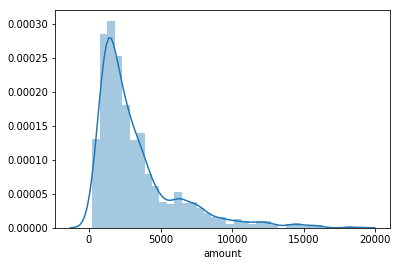

In [195]:
sns.distplot(df["amount"])

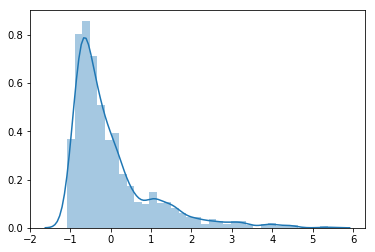

In [196]:
# Extra:: Let's see how does the distribution look when scaled (converted to zscore)
# There is no change is distribution shape
a = zscore(df["amount"])
sns.distplot(a)

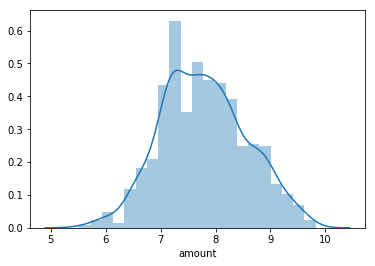

In [197]:
# Extra:: Let's see how does the distribution look when log transformed
# Now the distribution looks close to normal
b = np.log(df["amount"])
sns.distplot(b)

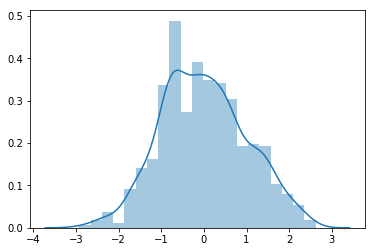

In [198]:
# Extra:: Standard scaling of log transformed data
c = zscore(b)
sns.distplot(c)

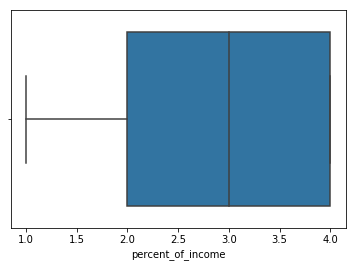

In [199]:
sns.boxplot(df["percent_of_income"])
# ZERO Outliers

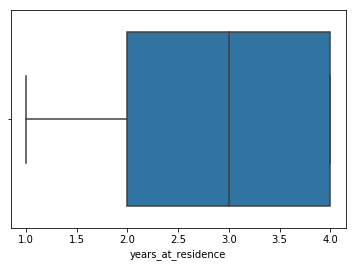

In [200]:
sns.boxplot(df["years_at_residence"])
# ZERO Outliers

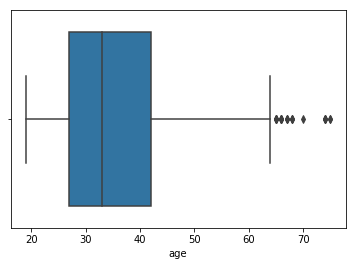

In [201]:
sns.boxplot(df["age"])
# There are a few (7) outliers

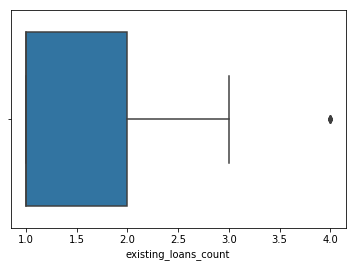

In [202]:
sns.boxplot(df['existing_loans_count'])
# One outlier

1    845
2    155
Name: dependents, dtype: int64

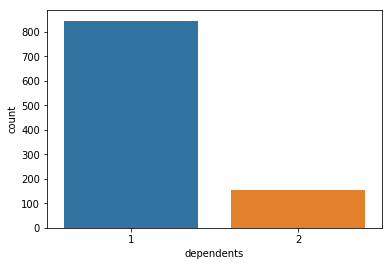

In [203]:
sns.countplot(df['dependents'])
df['dependents'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

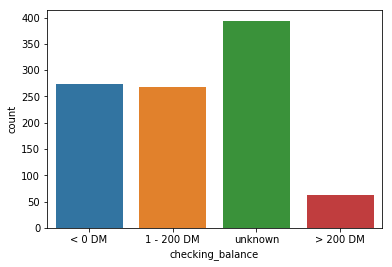

In [204]:
sns.countplot(df['checking_balance'])
df['checking_balance'].value_counts()
# unknown checking_balance has the highest bar

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

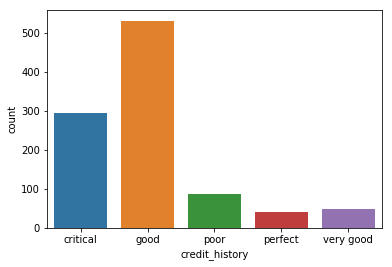

In [205]:
sns.countplot(df['credit_history'])
df['credit_history'].value_counts()

# Close to 300 with critical credit_history

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

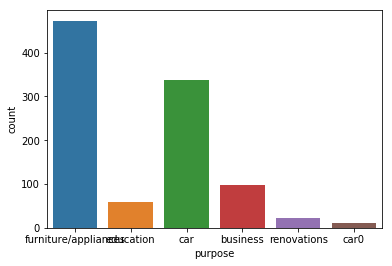

In [206]:
sns.countplot(df['purpose'])
df['purpose'].value_counts()
# Lot of people are getting it mostly for furniture/appliances and car

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

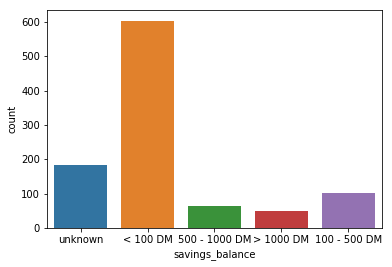

In [207]:
sns.countplot(df['savings_balance'])
df['savings_balance'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

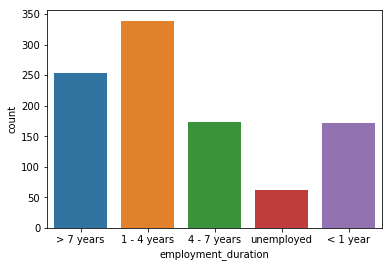

In [208]:
sns.countplot(df['employment_duration'])
df['employment_duration'].value_counts()

none     814
bank     139
store     47
Name: other_credit, dtype: int64

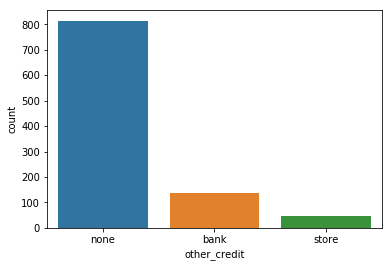

In [209]:
sns.countplot(df['other_credit'])
df['other_credit'].value_counts()

own      713
rent     179
other    108
Name: housing, dtype: int64

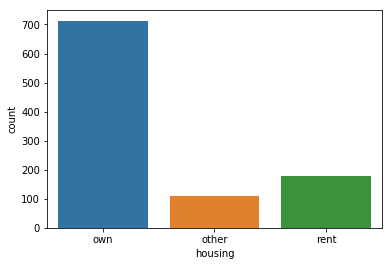

In [210]:
sns.countplot(df['housing'])
df['housing'].value_counts()

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

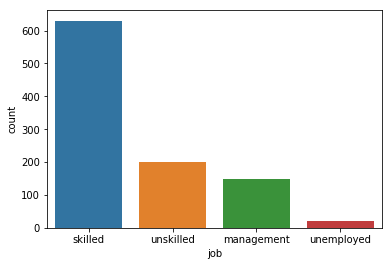

In [211]:
sns.countplot(df['job'])
df['job'].value_counts()

no     596
yes    404
Name: phone, dtype: int64

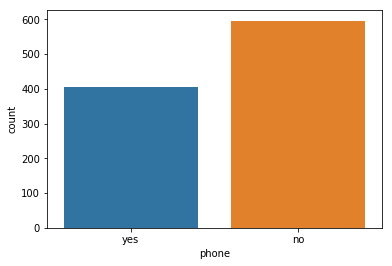

In [212]:
sns.countplot(df['phone'])
df['phone'].value_counts()

no     700
yes    300
Name: default, dtype: int64

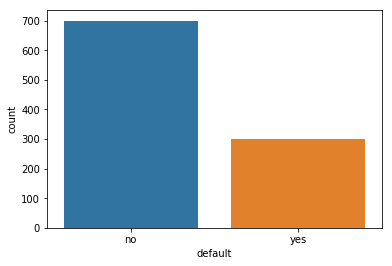

In [213]:
sns.countplot(df['default'])
df['default'].value_counts()

# 30% defaulters
# 70% non-defaulters

# Q2. Print 10 samples from the dataset

In [214]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


# Q3 Print the datatypes of each column and the shape of the dataset 

In [215]:
df.shape

(1000, 17)

In [216]:
# Already done before

# Q4 Print the descriptive statistics of each & every column using describe() function

In [217]:
# Already done before

# Q5 Covert categorical columns to numericals. Loops through each column and checks if the column type is object then converts those columns into numerical.

Or Encode all categorical variables into numbers so that you can apply models to it.

In [218]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [219]:
data_types = df.dtypes
for col in data_types.index:
    if (data_types[col] == 'object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


# Q6 See the distribution of 'default' variable and plot it using appropriate graph.

In [221]:
# Done before - It's been plotted using sns.countplot
# Important inference is 30% defaulters, 70% non-defaulters

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [222]:
df.corr()['default']
# Default has good relationship with months_loan_duration, credit_history, amount

checking_balance       -0.302406
months_loan_duration    0.214927
credit_history          0.193730
purpose                -0.055675
amount                  0.154739
savings_balance        -0.103133
employment_duration     0.008932
percent_of_income       0.072404
years_at_residence      0.002967
age                    -0.091127
other_credit           -0.053862
housing                 0.019315
existing_loans_count   -0.045732
job                    -0.032756
dependents             -0.003015
phone                  -0.036466
default                 1.000000
Name: default, dtype: float64

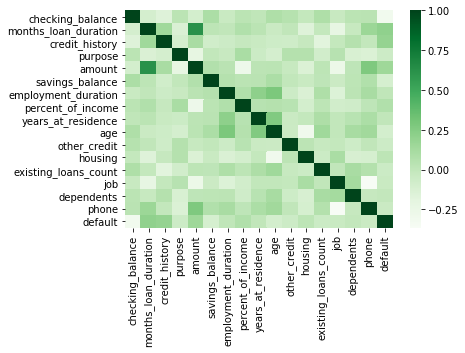

In [223]:
sns.heatmap(df.corr(), cmap="Greens")

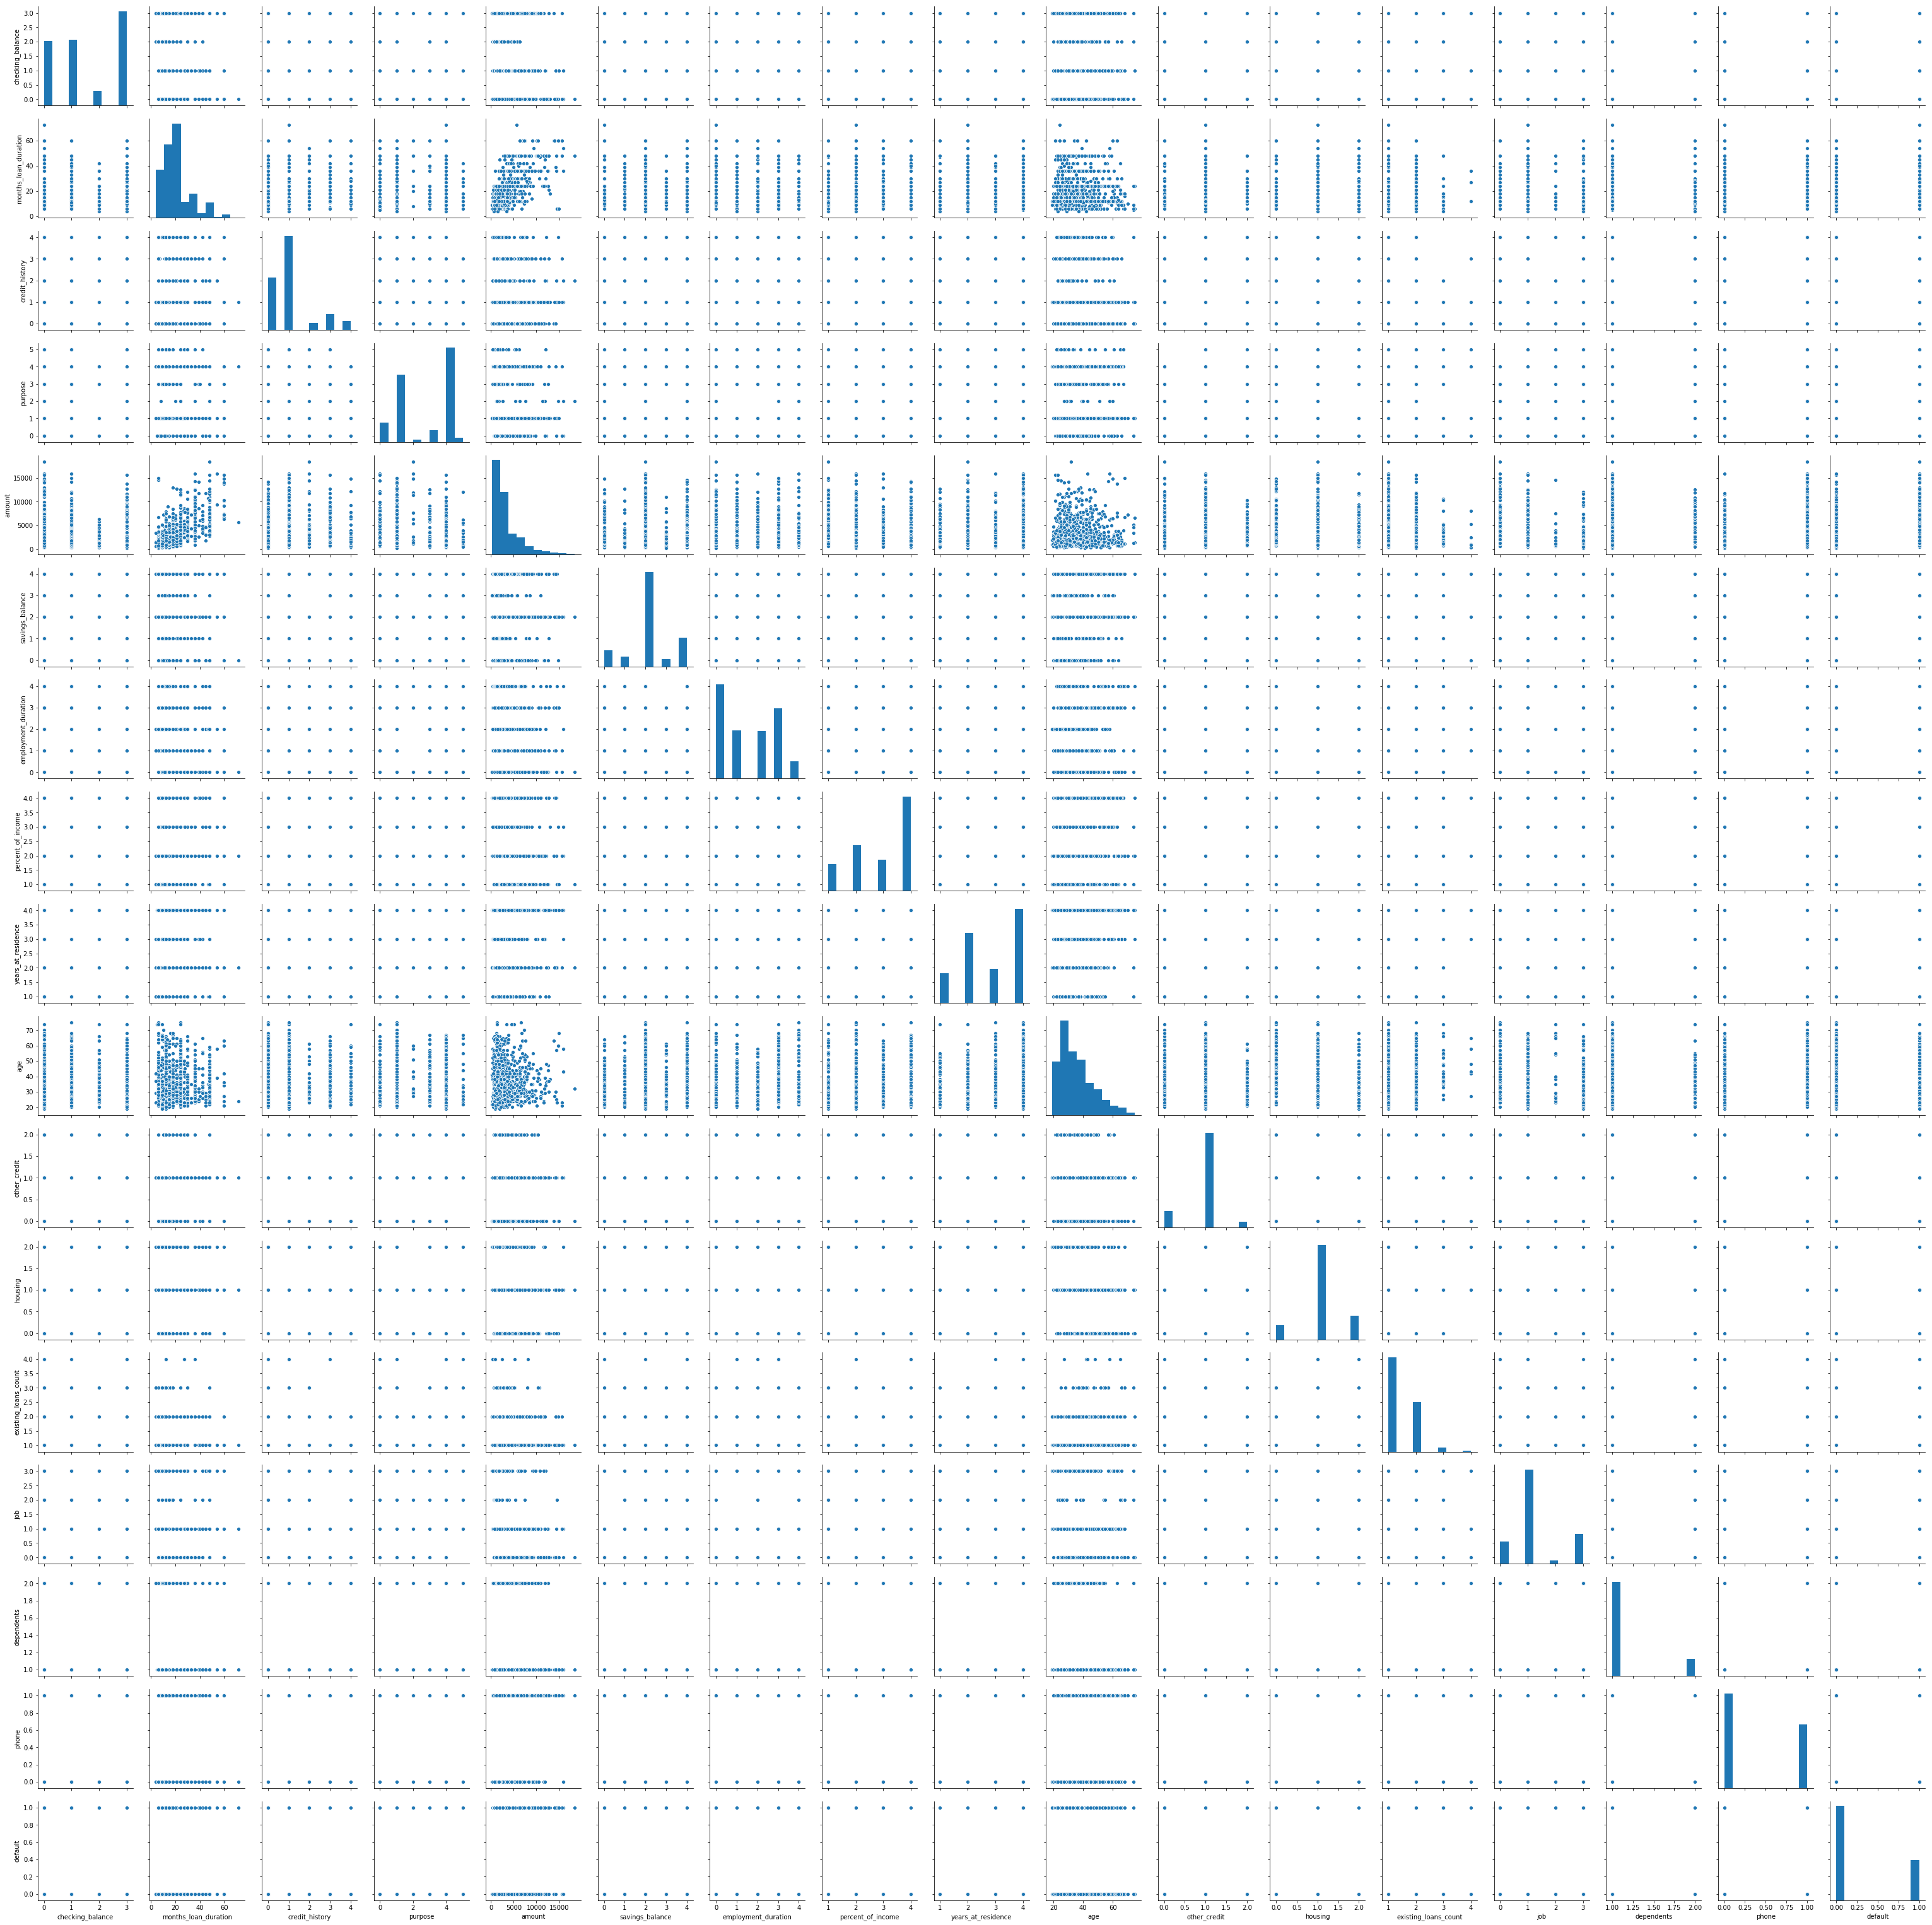

In [129]:
sns_plot = sns.pairplot(df)
sns_plot

In [130]:
sns_plot.savefig("R3_Internal_Lab_PairPlot.png")

# Q8 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).</b>


In [251]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [252]:
X = df.drop(['phone', 'default'], axis=1)
y = df['default']

In [258]:
X = X.apply(zscore)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
dt_model = DecisionTreeClassifier(criterion='entropy')

In [262]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [263]:
# Common Function to consolidate metrics
def consolidate_metrics(true_values, predicted_values):
    return pd.DataFrame(data = {"Values": [accuracy_score(true_values, predicted_values), 
                                           recall_score(true_values, predicted_values), 
                                           precision_score(true_values, predicted_values), 
                                           f1_score(true_values, predicted_values)]
                               }, index=["Accuracy", "Recall", "Precision", "F1"])

# Q10 Print the accuracy of the model & print the confusion matrix 

In [264]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [265]:
y_pred_dt = dt_model.predict(X_test)
consolidate_metrics(y_test, y_pred_dt)

,Values
Accuracy,0.690000
Recall,0.493976
Precision,0.445652
F1,0.468571


In [266]:
print("Confusion Matrix")
cf_dt = confusion_matrix(y_test, y_pred_dt)
cf_dt

Confusion Matrix


array([[166,  51],
       [ 42,  41]], dtype=int64)

Print the feature importance of the decision model - Optional

In [267]:
dt_model.feature_importances_

index = 0
for c in X_train.columns:
    print(c, " -- ", dt_model.feature_importances_[index])
    index += 1

checking_balance  --  0.10153698526035607
months_loan_duration  --  0.07636202525175186
credit_history  --  0.019289324560769823
purpose  --  0.08391631840805569
amount  --  0.2627555948262847
savings_balance  --  0.03235074195239258
employment_duration  --  0.05258274332593015
percent_of_income  --  0.03155210713866662
years_at_residence  --  0.06384769794973576
age  --  0.16719233952321658
other_credit  --  0.03188494258993923
housing  --  0.00658171295796358
existing_loans_count  --  0.018226159152516293
job  --  0.03130078784462137
dependents  --  0.020620519257799723


# Q11 - Display the above tree. You can use graphviz library for the same. You can save it in a Dot file first -- Optional

In [268]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [311]:
# Skipping this question for now as Graphviz is not installed on my machine
credit_graph_file = open('credit_graph.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=credit_graph_file, feature_names = list(X_train))
credit_graph_file.close()

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
# The Base Estimator for RandomForestClassifier is DecissionTree.

In [271]:
# Create default RandomForestClassifier without any configurations
# n_estimators changed to 100 from default 10 due to a warning
# features are sqrt(total number of features)
# bootstrap sampling is used which means each sample has equal probablity of getting selected ( as well as equal probablity of
# not getting selected)
rf_model=RandomForestClassifier(n_estimators = 100, random_state=7)

In [272]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [273]:
y_pred_rf = rf_model.predict(X_test)

In [274]:
consolidate_metrics(y_test, y_pred_rf)

,Values
Accuracy,0.786667
Recall,0.445783
Precision,0.672727
F1,0.536232


In [275]:
print("Confusion Matrix")
cf_rf = confusion_matrix(y_test, y_pred_rf)
cf_rf

Confusion Matrix


array([[199,  18],
       [ 46,  37]], dtype=int64)

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [277]:
from sklearn.ensemble import AdaBoostClassifier

In [281]:
# Going with default Base Estimator which is Decission Tree
# and default number of estimators (50)
boost_dt_model = AdaBoostClassifier(random_state=7)

In [282]:
boost_dt_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=7)

In [283]:
y_predict_boost_dt = boost_dt_model.predict(X_test)

In [284]:
consolidate_metrics(y_test, y_predict_boost_dt)

,Values
Accuracy,0.766667
Recall,0.518072
Precision,0.589041
F1,0.551282


In [285]:
print("Confusion Matrix")
cf_boost_dt = confusion_matrix(y_test, y_predict_boost_dt)
cf_boost_dt

Confusion Matrix


array([[187,  30],
       [ 40,  43]], dtype=int64)

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [312]:
from sklearn.ensemble import BaggingClassifier

In [296]:
base_dt = DecisionTreeClassifier(criterion='entropy')

In [297]:
bag_dt_model=BaggingClassifier(base_estimator=base_dt, n_estimators=17, random_state=7)

In [298]:
bag_dt_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=17, n_jobs=None, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [302]:
y_pred_bag = bag_dt_model.predict(X_test)

In [303]:
consolidate_metrics(y_test, y_pred_bag)

,Values
Accuracy,0.776667
Recall,0.518072
Precision,0.614286
F1,0.562092


In [304]:
print("Confusion Matrix")
cf_bag_knn = confusion_matrix(y_test, y_pred_bag)
cf_bag_knn

Confusion Matrix


array([[190,  27],
       [ 40,  43]], dtype=int64)

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [306]:
from sklearn.ensemble import GradientBoostingClassifier

In [307]:
gb_model=GradientBoostingClassifier(n_estimators=50, random_state=7)

In [308]:
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [309]:
consolidate_metrics(y_test, y_pred_gb)

,Values
Accuracy,0.783333
Recall,0.457831
Precision,0.655172
F1,0.539007


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

## Write your inference from the above models